In [59]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [60]:
CGPA_val = 9.5
Undergrad_University_val = 95
SOP_val = 95
GRE_val = 330

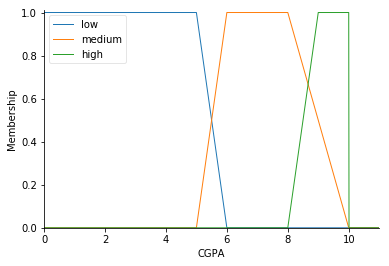

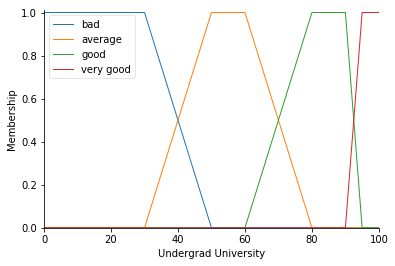

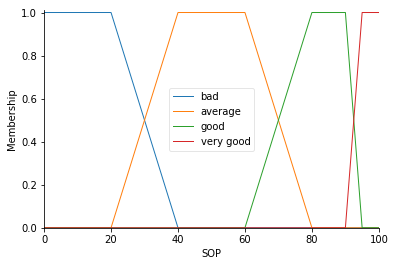

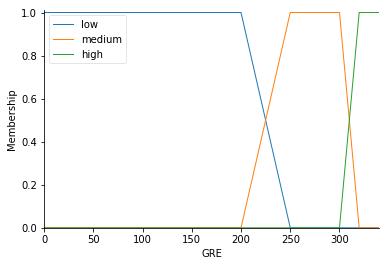

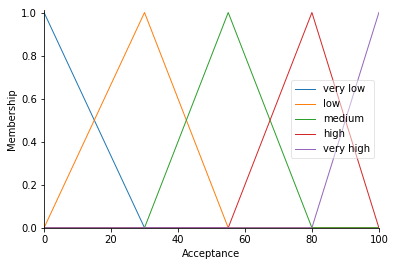

In [61]:
cgpa = ctrl.Antecedent(np.arange(0, 11, .01), 'CGPA')
undergrad_university = ctrl.Antecedent(np.arange(0, 101, 1), 'Undergrad University')
sop = ctrl.Antecedent(np.arange(0, 101, 1), 'SOP')
gre = ctrl.Antecedent(np.arange(0, 341, 1), 'GRE')
acceptance = ctrl.Consequent(np.arange(0, 101, 1), 'Acceptance')

cgpa['low'] = fuzzy.trapmf(cgpa.universe, [0, 0, 5, 6])
cgpa['medium'] = fuzzy.trapmf(cgpa.universe, [5,6,8,10])
cgpa['high'] = fuzzy.trapmf(cgpa.universe, [8, 9, 10, 10])

undergrad_university['bad'] = fuzzy.trapmf(undergrad_university.universe, [0, 0, 30, 50])
undergrad_university['average'] = fuzzy.trapmf(undergrad_university.universe, [30,50,60,80])
undergrad_university['good'] = fuzzy.trapmf(undergrad_university.universe, [60, 80, 90, 95])
undergrad_university['very good'] = fuzzy.trapmf(undergrad_university.universe, [90, 95, 100, 100])

sop['bad'] = fuzzy.trapmf(sop.universe, [0, 0, 20, 40])
sop['average'] = fuzzy.trapmf(sop.universe, [20,40,60,80])
sop['good'] = fuzzy.trapmf(sop.universe, [60, 80, 90, 95])
sop['very good'] = fuzzy.trapmf(sop.universe, [90, 95, 100, 100])

gre['low'] = fuzzy.trapmf(gre.universe, [0, 0, 200, 250])
gre['medium'] = fuzzy.trapmf(gre.universe, [200,250,300,320])
gre['high'] = fuzzy.trapmf(gre.universe, [300, 340, 340, 340])

gre['low'] = fuzzy.trapmf(gre.universe, [0, 0, 200, 250])
gre['medium'] = fuzzy.trapmf(gre.universe, [200,250,300,320])
gre['high'] = fuzzy.trapmf(gre.universe, [300, 320, 340, 340])

acceptance['very low'] = fuzzy.trimf(acceptance.universe, [0, 0, 30])
acceptance['low'] = fuzzy.trimf(acceptance.universe, [0, 30, 55])
acceptance['medium'] = fuzzy.trimf(acceptance.universe, [30, 55, 80])
acceptance['high'] = fuzzy.trimf(acceptance.universe, [55, 80, 100])
acceptance['very high'] = fuzzy.trimf(acceptance.universe, [80, 100, 100])

cgpa.view()
undergrad_university.view()
sop.view()
gre.view()
acceptance.view()

In [62]:
rule1 = ctrl.Rule(cgpa['low'], acceptance['very low'])
rule2 = ctrl.Rule(cgpa['medium'] & undergrad_university['bad'], acceptance['low'])
rule3 = ctrl.Rule(cgpa['medium'] & undergrad_university['average'], acceptance['low'])
rule4 = ctrl.Rule(cgpa['medium'] & undergrad_university['good'], acceptance['medium'])
rule5 = ctrl.Rule(cgpa['medium'] & undergrad_university['very good'], acceptance['high'])
rule6 = ctrl.Rule(cgpa['high'] & undergrad_university['bad'], acceptance['low'])
rule7 = ctrl.Rule(cgpa['high'] & undergrad_university['average'], acceptance['medium'])
rule8 = ctrl.Rule(cgpa['high'] & undergrad_university['good'], acceptance['medium'])
rule9 = ctrl.Rule(cgpa['high'] & undergrad_university['very good'], acceptance['very high'])
rule10 = ctrl.Rule(sop['bad'], acceptance['very low'])
rule11 = ctrl.Rule(sop['average'] & gre['low'], acceptance['very low'])
rule12 = ctrl.Rule(sop['average'] & gre['medium'], acceptance['very low'])
rule13 = ctrl.Rule(sop['average'] & gre['high'], acceptance['low'])
rule14 = ctrl.Rule(sop['good'] & gre['low'], acceptance['low'])
rule15 = ctrl.Rule(sop['good'] & gre['medium'], acceptance['medium'])
rule16 = ctrl.Rule(sop['good'] & gre['high'], acceptance['high'])
rule17 = ctrl.Rule(sop['very good'] & gre['low'], acceptance['medium'])
rule18 = ctrl.Rule(sop['very good'] & gre['medium'], acceptance['high'])
rule19 = ctrl.Rule(sop['very good'] & gre['high'], acceptance['very high'])
rule20 = ctrl.Rule(cgpa['medium'] & sop['bad'], acceptance['low'])
rule21 = ctrl.Rule(cgpa['medium'] & sop['average'], acceptance['low'])
rule22 = ctrl.Rule(cgpa['medium'] & sop['good'], acceptance['medium'])
rule23 = ctrl.Rule(cgpa['medium'] & sop['very good'], acceptance['high'])
rule24 = ctrl.Rule(cgpa['high'] & sop['bad'], acceptance['low'])
rule25 = ctrl.Rule(cgpa['high'] & sop['average'], acceptance['medium'])
rule26 = ctrl.Rule(cgpa['high'] & sop['good'], acceptance['high'])
rule27 = ctrl.Rule(cgpa['high'] & sop['very good'], acceptance['very high'])


acceptance_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])
acceptance_model = ctrl.ControlSystemSimulation(acceptance_ctrl)


In [63]:
acceptance_model.input['CGPA'] = CGPA_val
acceptance_model.input['Undergrad University'] = Undergrad_University_val
acceptance_model.input['SOP'] = SOP_val
acceptance_model.input['GRE'] = GRE_val
acceptance_model.compute()
print(acceptance_model.output['Acceptance'])

84.60760517799352
